<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [32]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [33]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)


In [34]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




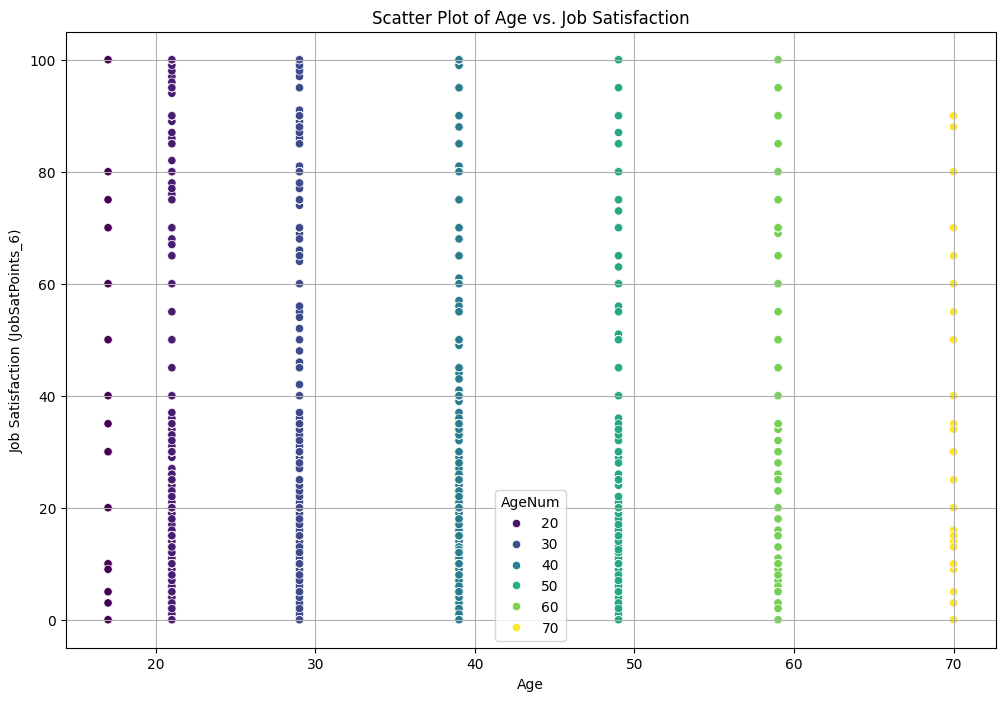

In [35]:
# Convert the 'Age' column to numeric values for better plotting
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'AgeNum' and 'JobSatPoints_6'
df_filtered = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='AgeNum', y='JobSatPoints_6', hue='AgeNum', palette='viridis')
plt.title('Scatter Plot of Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()


/tmp/ipykernel_83/3239795636.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AgeNum'] = df_filtered['Age'].map(age_mapping)


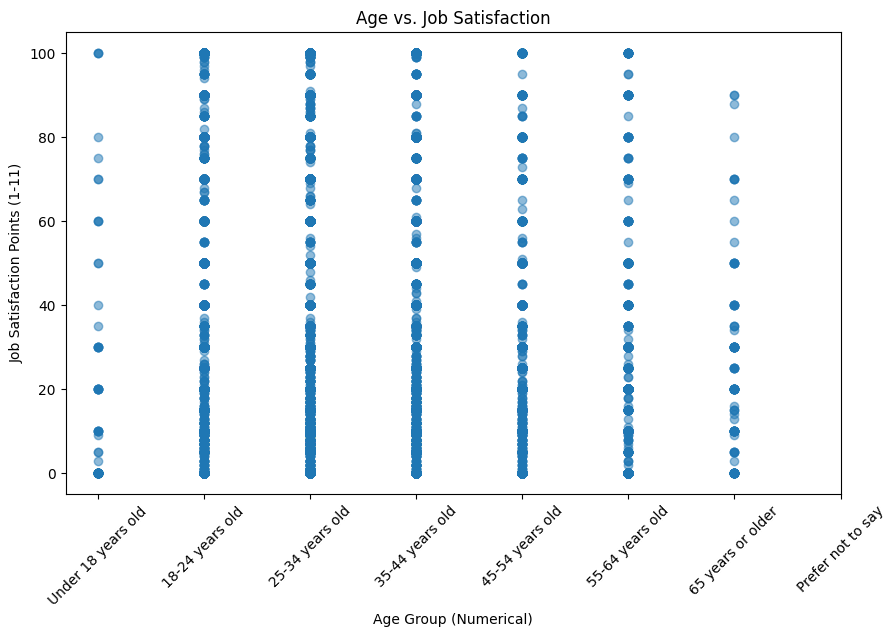

In [36]:
# Filter out missing values
df_filtered = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Apply the mapping using apply
df_filtered['AgeNum'] = df_filtered['Age'].map(age_mapping)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['AgeNum'], df_filtered['JobSatPoints_6'], alpha=0.5)

# Set labels and title
plt.xlabel('Age Group (Numerical)')
plt.ylabel('Job Satisfaction Points (1-11)')
plt.title('Age vs. Job Satisfaction')

# Customize x-axis labels
plt.xticks(range(8), age_mapping.keys(), rotation=45)

# Show the plot
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


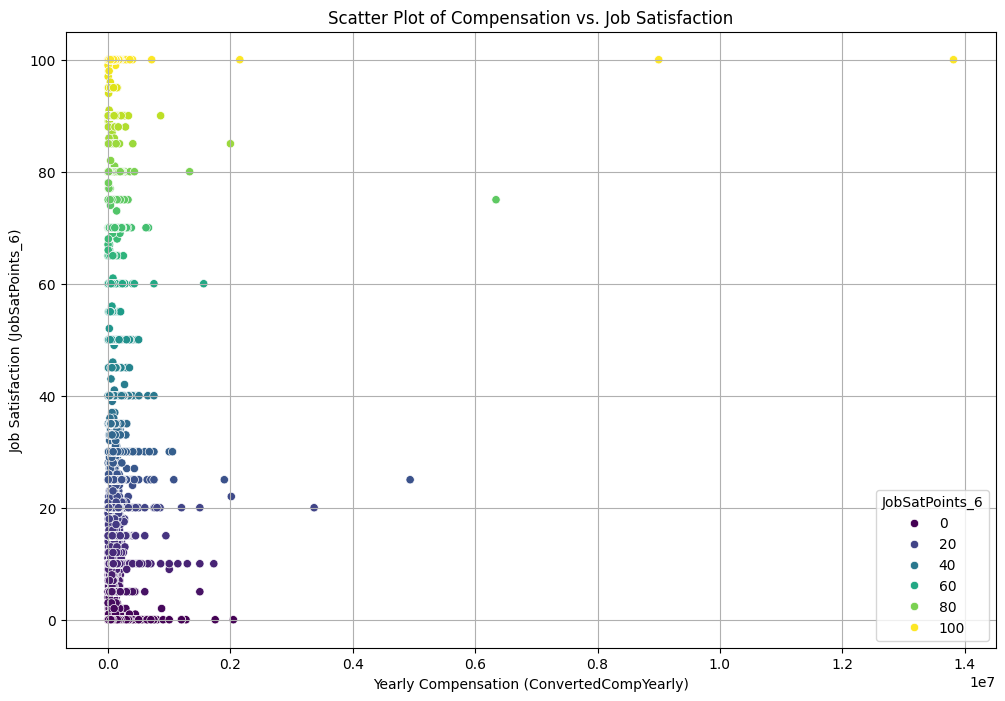

In [37]:
# Filter out rows with missing values in 'ConvertedCompYearly' and 'JobSatPoints_6'
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6', hue='JobSatPoints_6', palette='viridis')
plt.title('Scatter Plot of Compensation vs. Job Satisfaction')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

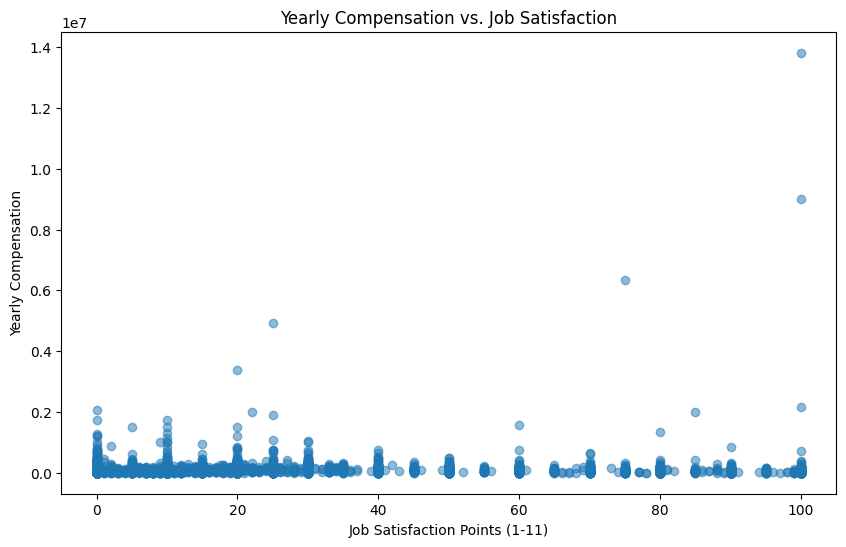

In [38]:
# Filter out missing values
df_filtered = df[(df['ConvertedCompYearly'].notna()) & (df['JobSatPoints_6'].notna())]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['JobSatPoints_6'], df_filtered['ConvertedCompYearly'], alpha=0.5)

# Set labels and title
plt.xlabel('Job Satisfaction Points (1-11)')
plt.ylabel('Yearly Compensation')
plt.title('Yearly Compensation vs. Job Satisfaction')

# Show the plot
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


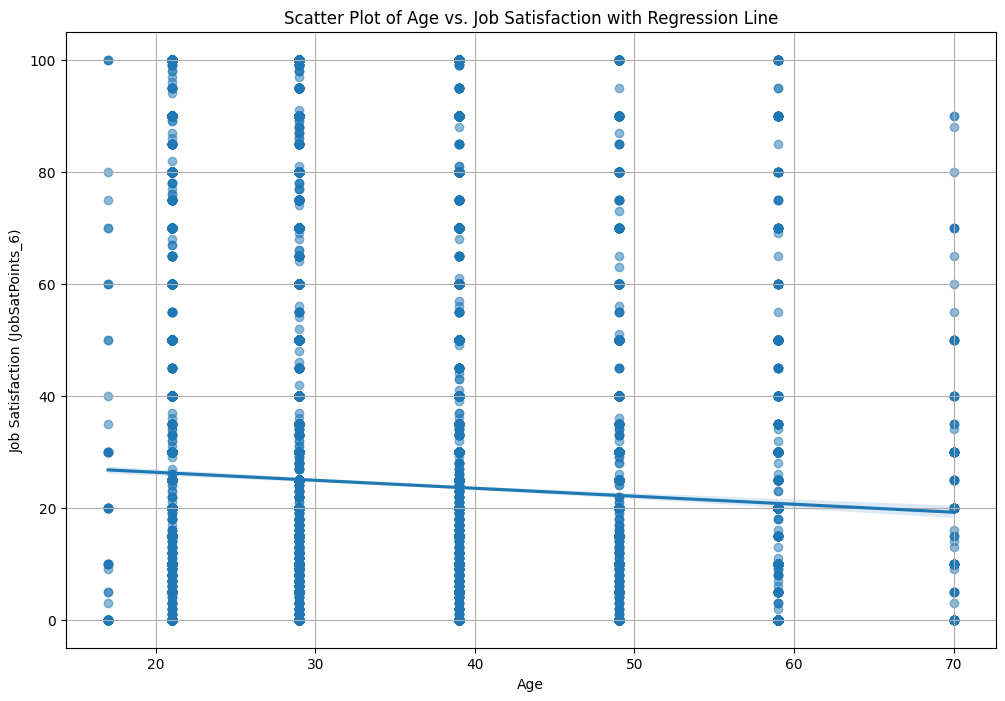

In [39]:
# Convert the 'Age' column to numeric values for better plotting
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'AgeNum' and 'JobSatPoints_6'
df_filtered = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(data=df_filtered, x='AgeNum', y='JobSatPoints_6', scatter=True, fit_reg=True, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Age vs. Job Satisfaction with Regression Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

/tmp/ipykernel_83/3195067605.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AgeNum'] = df_filtered['Age'].apply(lambda x: age_mapping.get(x, x))


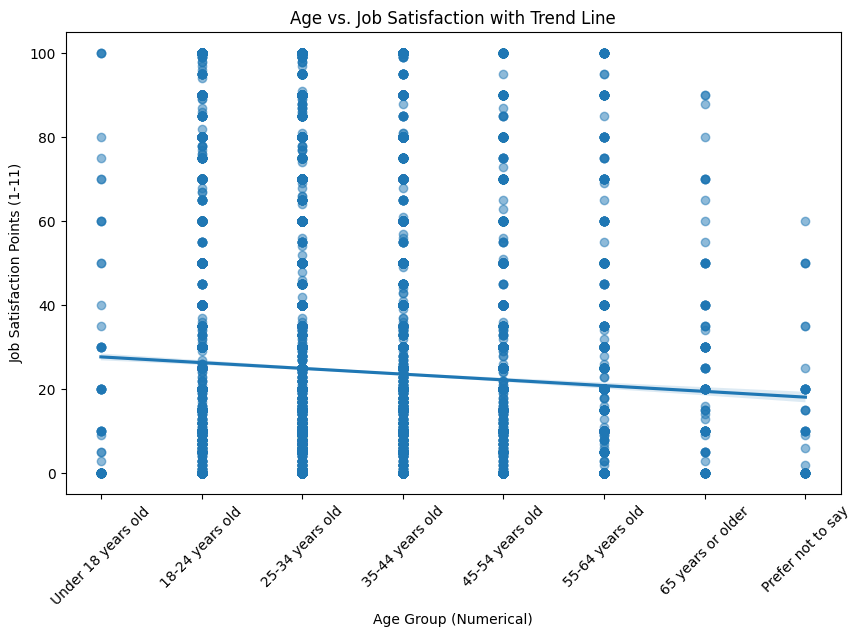

In [40]:
# Filter out missing values
df_filtered = df[(df['Age'].notna()) & (df['JobSatPoints_6'].notna())]

# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Apply the mapping using apply
df_filtered['AgeNum'] = df_filtered['Age'].apply(lambda x: age_mapping.get(x, x))

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='AgeNum', y='JobSatPoints_6', data=df_filtered, scatter_kws={'alpha':0.5}) 

# Set labels and title
plt.xlabel('Age Group (Numerical)')
plt.ylabel('Job Satisfaction Points (1-11)')
plt.title('Age vs. Job Satisfaction with Trend Line')

# Customize x-axis labels
plt.xticks(range(8), age_mapping.keys(), rotation=45)

# Show the plot
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


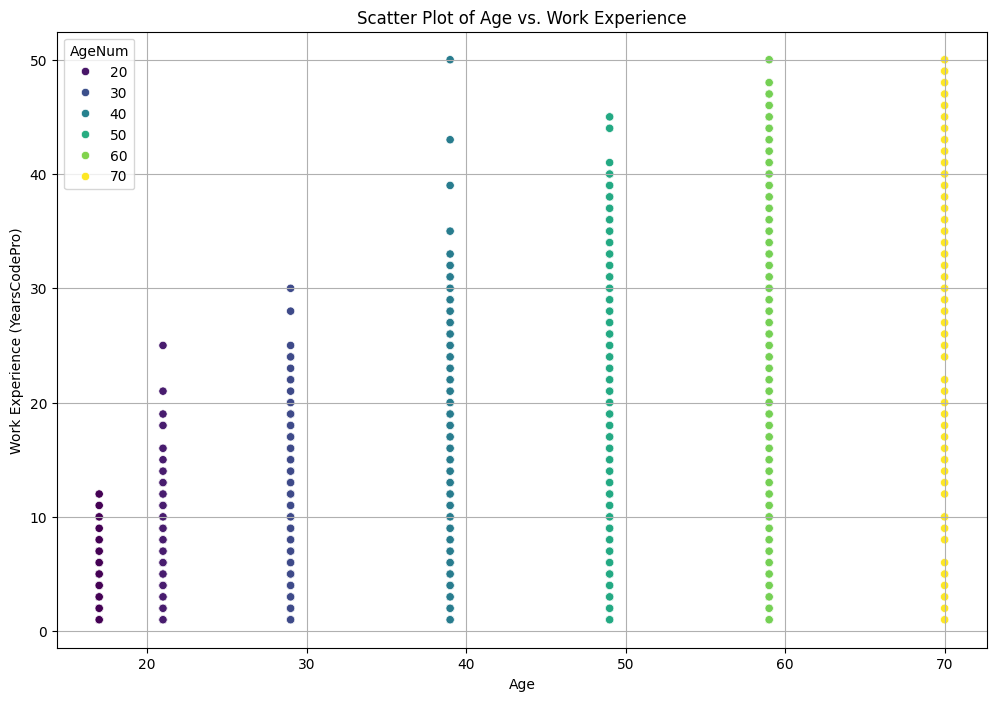

In [41]:
# Convert the 'Age' column to numeric values for better plotting
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Convert 'YearsCodePro' to numeric values, handling non-numeric entries
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Filter out rows with missing values in 'AgeNum' and 'YearsCodePro'
df_filtered = df.dropna(subset=['AgeNum', 'YearsCodePro'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='AgeNum', y='YearsCodePro', hue='AgeNum', palette='viridis')
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)
plt.show()

/tmp/ipykernel_83/3863338989.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AgeNum'] = df_filtered['Age'].apply(lambda x: age_mapping.get(x, x))
/tmp/ipykernel_83/3863338989.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')


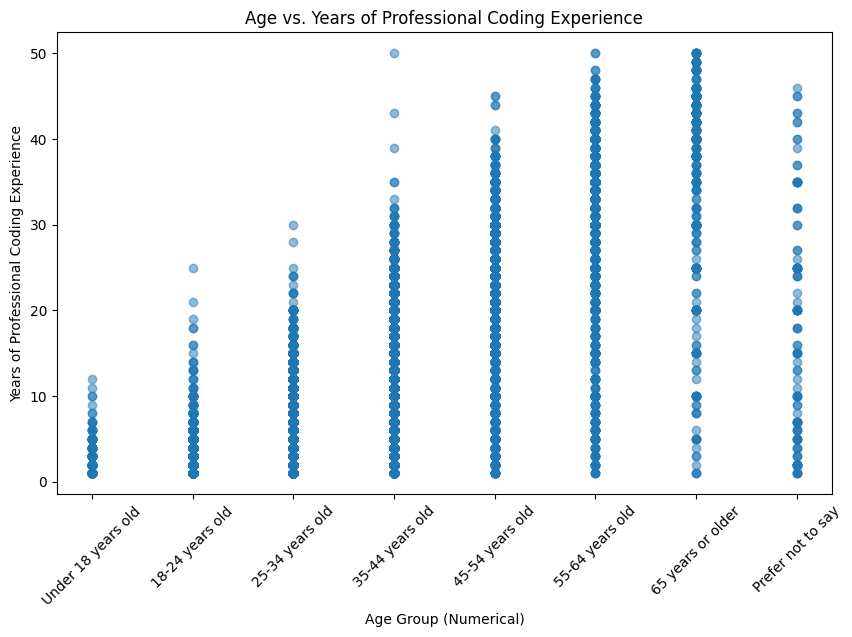

In [42]:
# Filter out missing values
df_filtered = df[(df['Age'].notna()) & (df['YearsCodePro'].notna())]

# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Apply the mapping using apply
df_filtered['AgeNum'] = df_filtered['Age'].apply(lambda x: age_mapping.get(x, x))

# Convert 'YearsCodePro' to numeric (handle potential errors)
df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['AgeNum'], df_filtered['YearsCodePro'], alpha=0.5)

# Set labels and title
plt.xlabel('Age Group (Numerical)')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Age vs. Years of Professional Coding Experience')

# Customize x-axis labels
plt.xticks(range(8), age_mapping.keys(), rotation=45)

# Show the plot
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


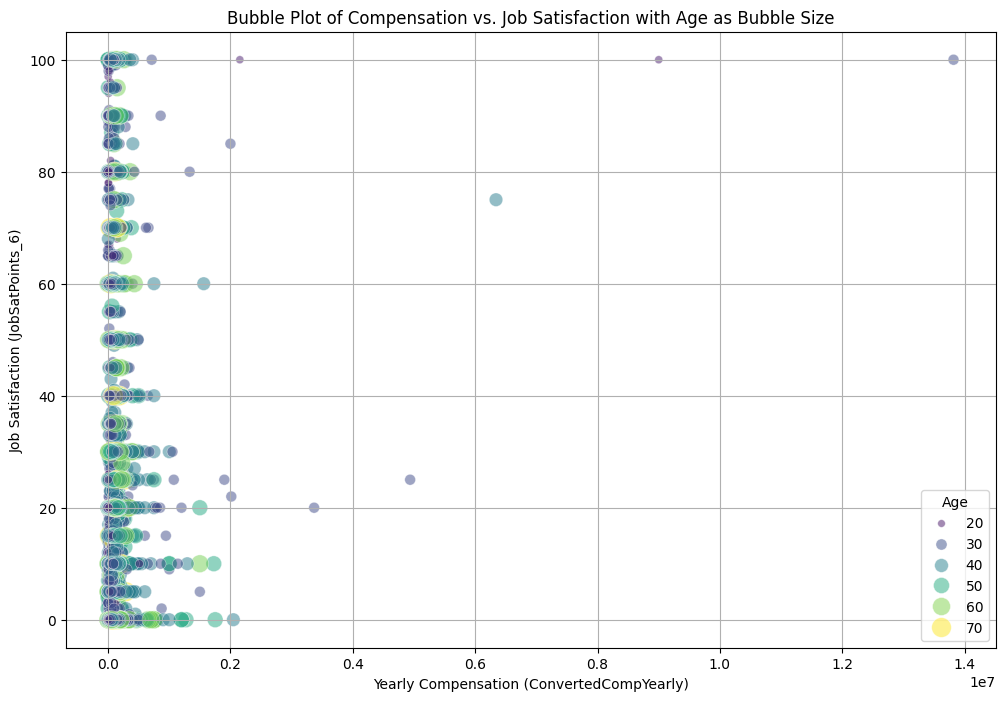

In [43]:
# Convert the 'Age' column to numeric values for bubble size
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'ConvertedCompYearly', 'JobSatPoints_6', and 'AgeNum'
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNum'])

# Create the bubble plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6',
                              size='AgeNum', sizes=(20, 200), alpha=0.5, hue='AgeNum', palette='viridis')
plt.title('Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend(title='Age')
plt.grid(True)
plt.show()

/tmp/ipykernel_83/349656191.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AgeNum'] = df_filtered['Age'].apply(lambda x: age_mapping.get(x, x))


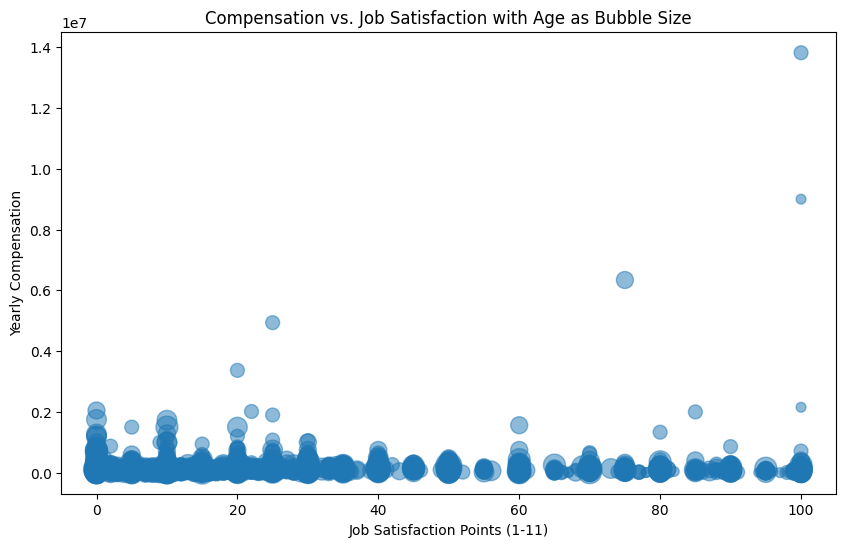

In [44]:
# Filter out missing values
df_filtered = df[(df['ConvertedCompYearly'].notna()) & 
                 (df['JobSatPoints_6'].notna()) & 
                 (df['Age'].notna())]

# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Apply the mapping using apply
df_filtered['AgeNum'] = df_filtered['Age'].apply(lambda x: age_mapping.get(x, x))

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['JobSatPoints_6'], 
            df_filtered['ConvertedCompYearly'], 
            s=df_filtered['AgeNum'] * 50,  # Adjust bubble size scaling as needed
            alpha=0.5)

# Set labels and title
plt.xlabel('Job Satisfaction Points (1-11)')
plt.ylabel('Yearly Compensation')
plt.title('Compensation vs. Job Satisfaction with Age as Bubble Size')

# Show the plot
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


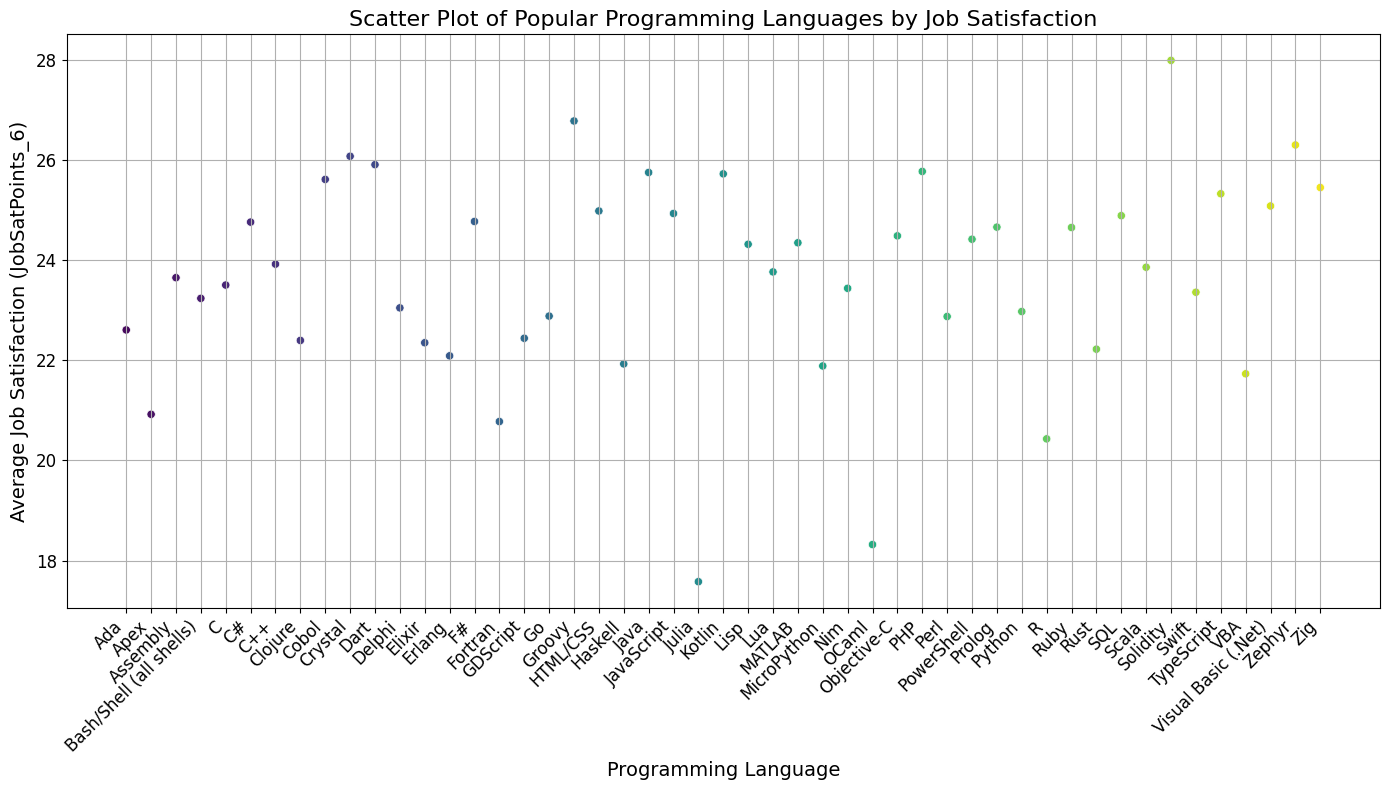

In [45]:
# Filter out rows with missing values in 'JobSatPoints_6' and 'LanguageHaveWorkedWith'
df_filtered = df.dropna(subset=['JobSatPoints_6', 'LanguageHaveWorkedWith'])

# Explode the 'LanguageHaveWorkedWith' column by splitting it by ';' and stacking the results
df_exploded = df_filtered.assign(LanguageHaveWorkedWith=df_filtered['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Calculate the average job satisfaction for each language
avg_job_sat = df_exploded.groupby('LanguageHaveWorkedWith')['JobSatPoints_6'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=avg_job_sat, x='LanguageHaveWorkedWith', y='JobSatPoints_6', hue='LanguageHaveWorkedWith', palette='viridis', legend=False)

# Enhance the plot's aesthetics
plt.title('Scatter Plot of Popular Programming Languages by Job Satisfaction', fontsize=16)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adjust the layout to ensure labels are not cut off
plt.tight_layout()

# Show the plot
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_83/2672995669.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


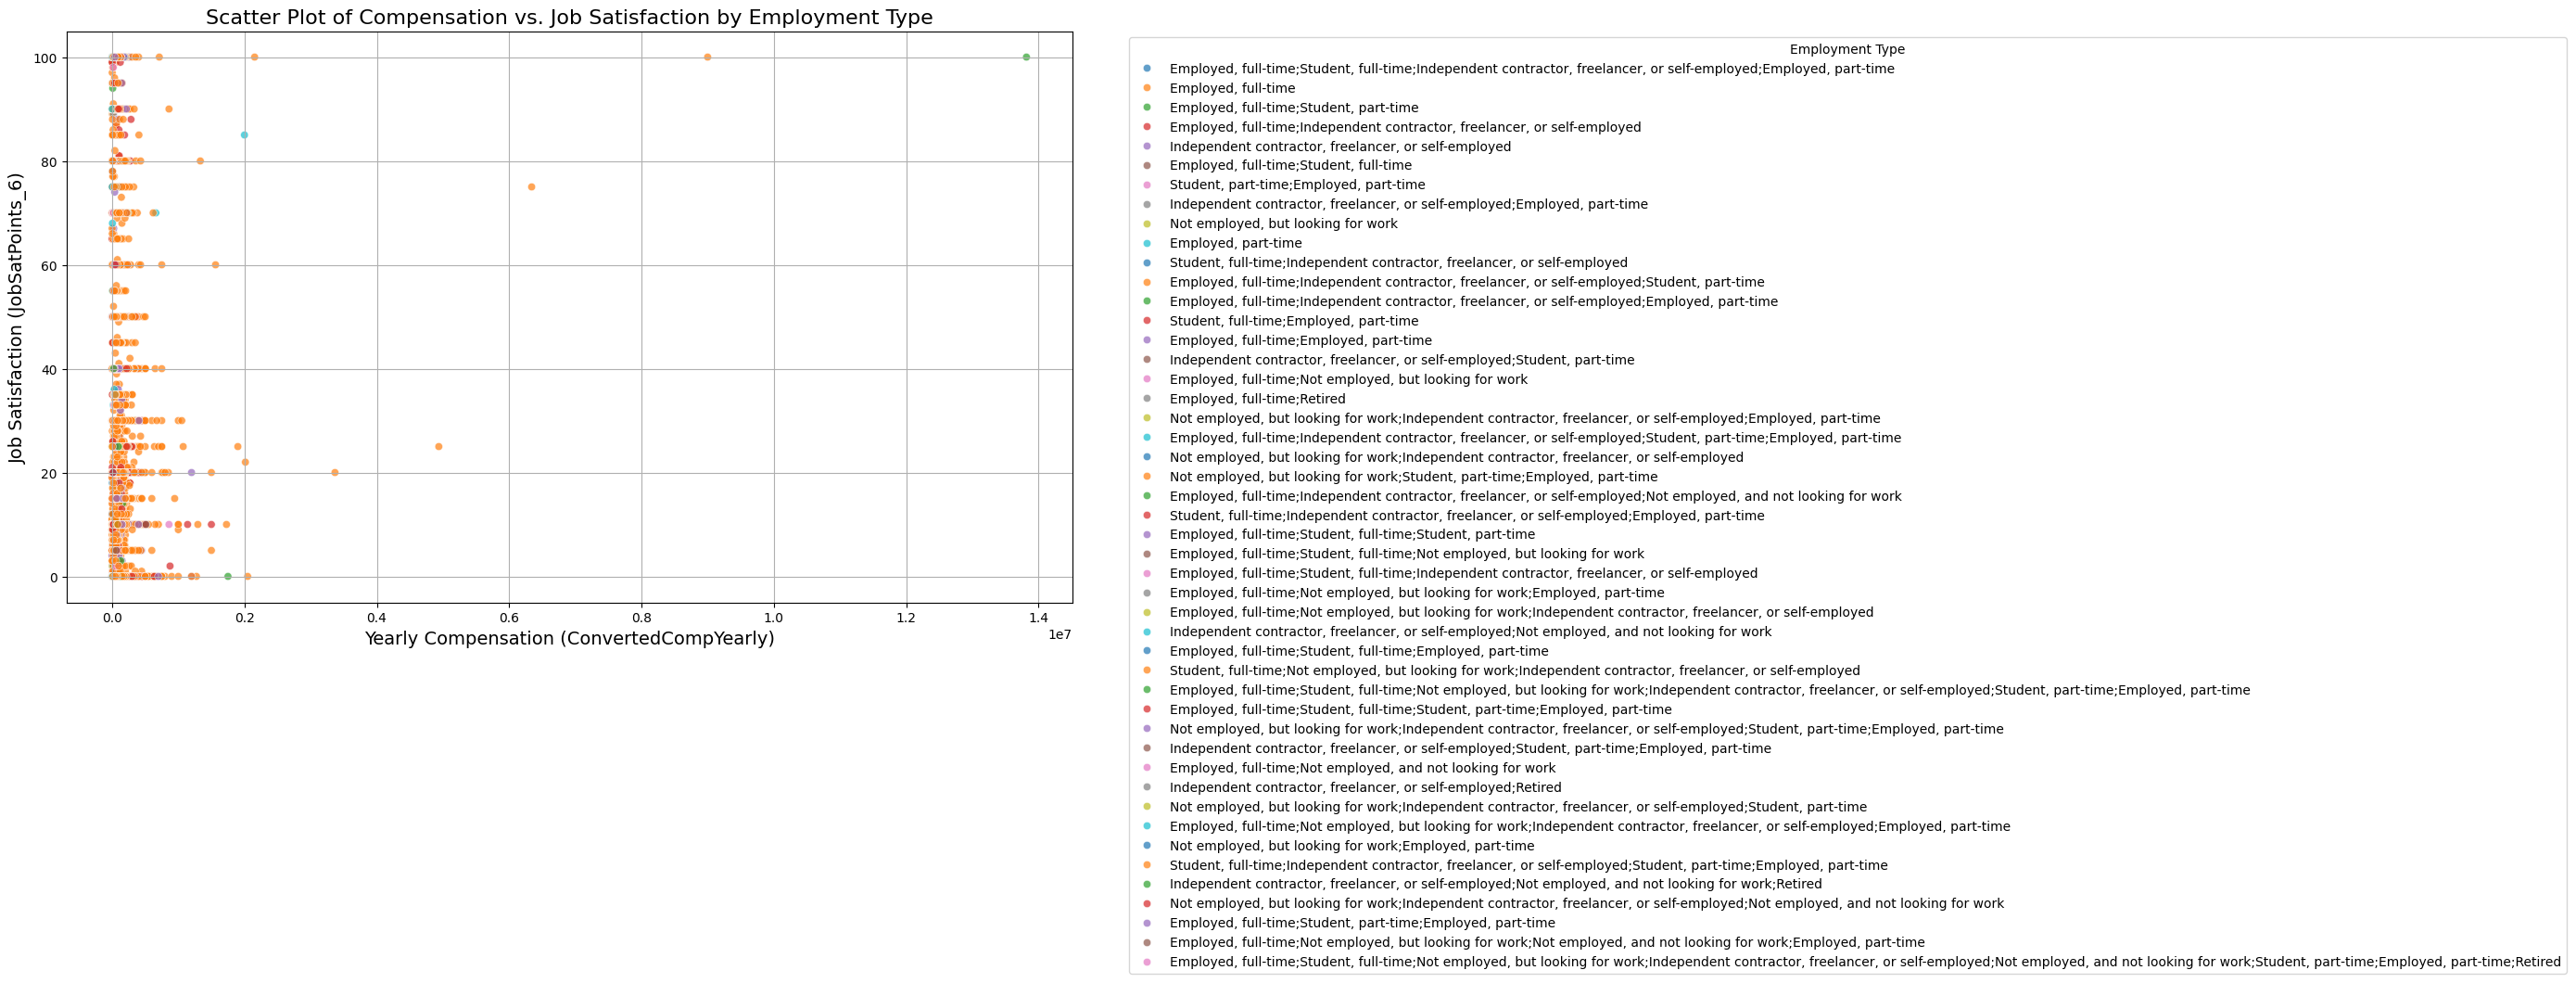

In [46]:
# Filter out rows with missing values in 'ConvertedCompYearly', 'JobSatPoints_6', and 'Employment'
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment', palette='tab10', alpha=0.7)

# Enhance the plot's aesthetics
plt.title('Scatter Plot of Compensation vs. Job Satisfaction by Employment Type', fontsize=16)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust the layout to ensure labels are not cut off
plt.tight_layout()

# Show the plot
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


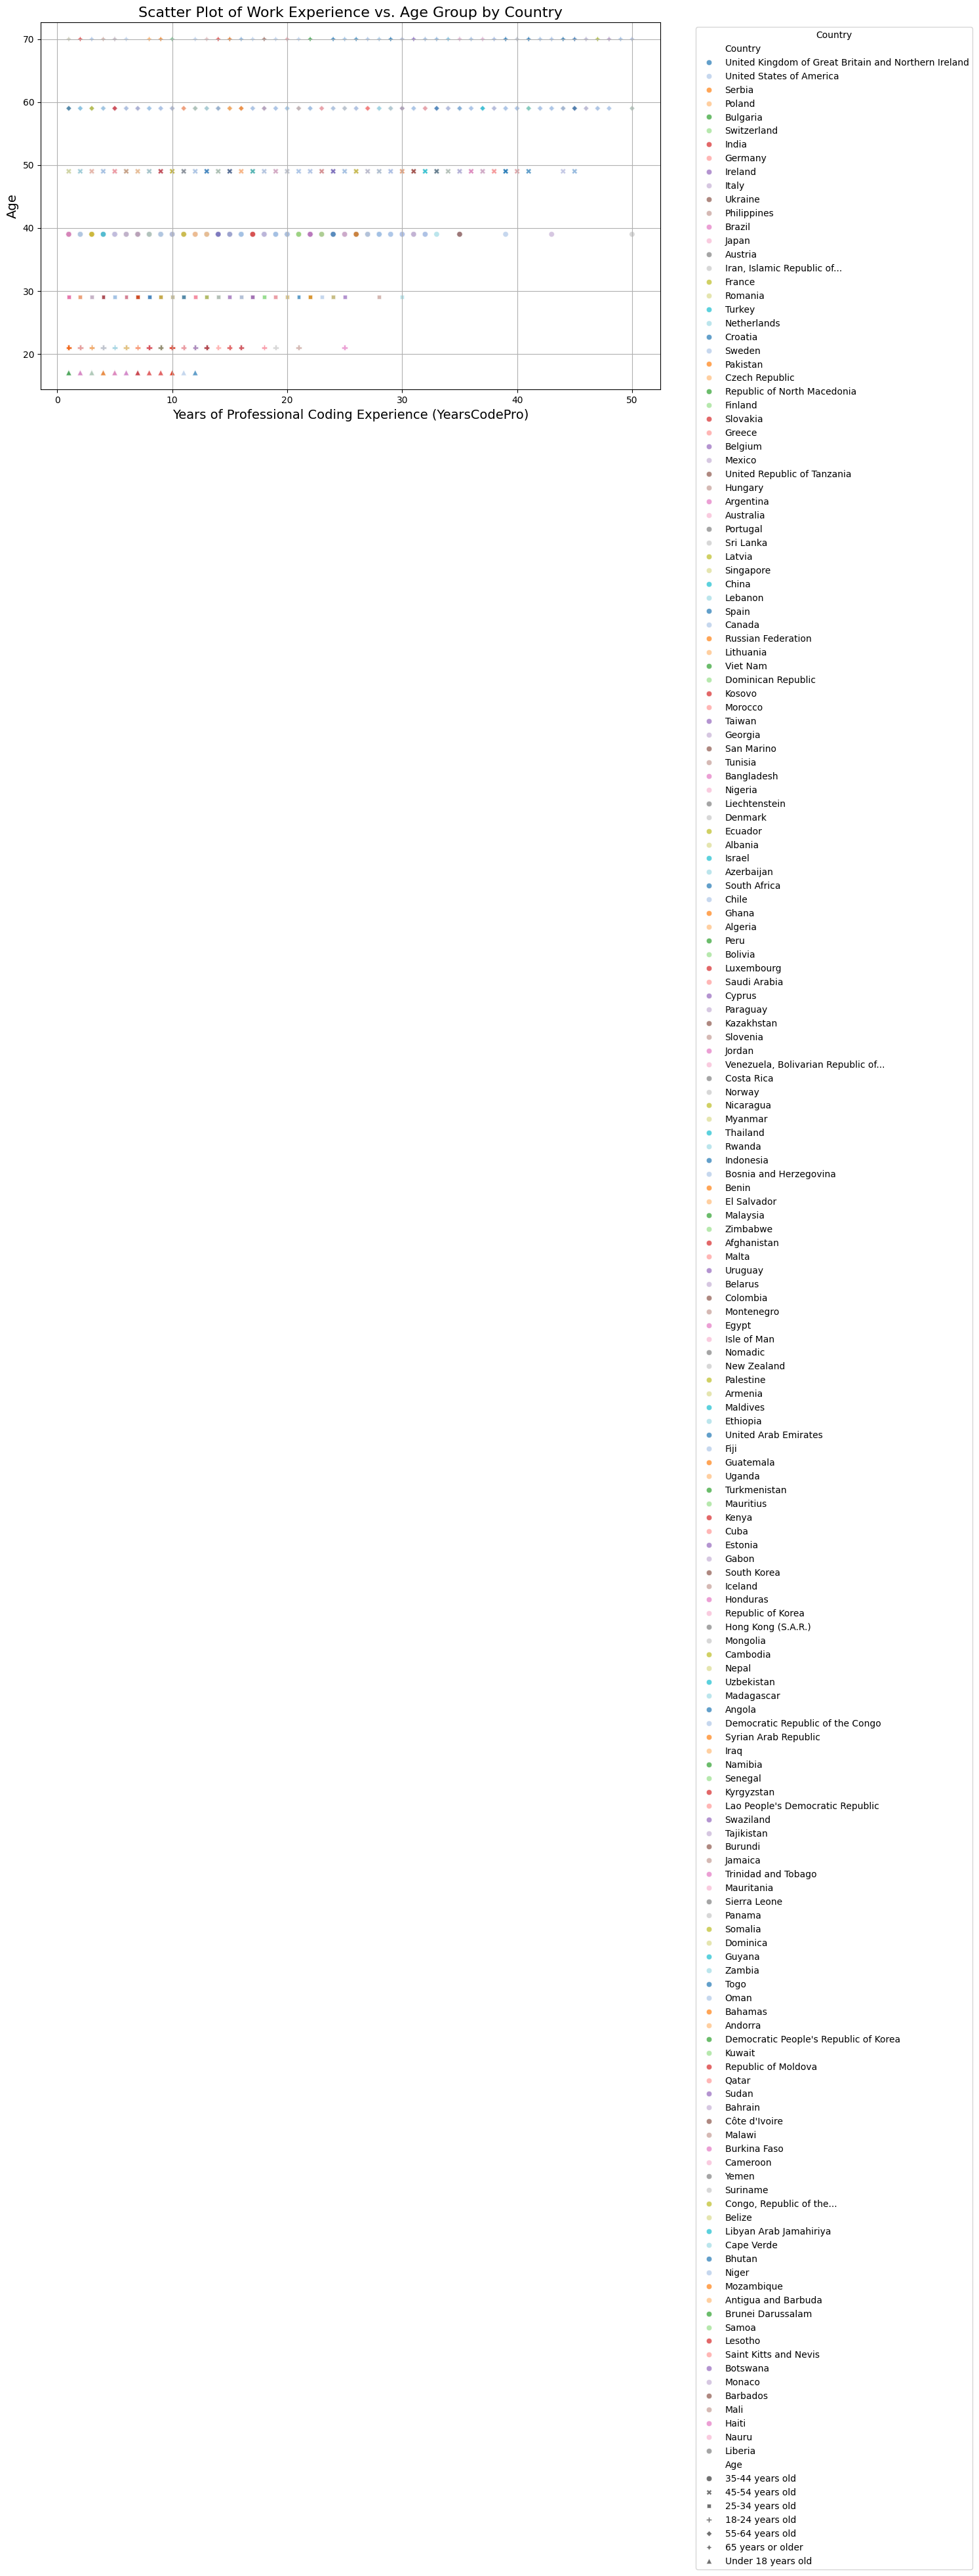

In [47]:
# Convert the 'Age' column to numeric values for better plotting
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Convert 'YearsCodePro' to numeric values, handling non-numeric entries
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Filter out rows with missing values in 'YearsCodePro', 'AgeNum', and 'Country'
df_filtered = df.dropna(subset=['YearsCodePro', 'AgeNum', 'Country'])

# Create the scatter plot
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=df_filtered, x='YearsCodePro', y='AgeNum', hue='Country', style='Age', palette='tab20', markers=True, alpha=0.7)

# Enhance the plot's aesthetics
scatter_plot.set_title('Scatter Plot of Work Experience vs. Age Group by Country', fontsize=16)
scatter_plot.set_xlabel('Years of Professional Coding Experience (YearsCodePro)', fontsize=14)
scatter_plot.set_ylabel('Age', fontsize=14)
scatter_plot.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
scatter_plot.grid(True)

# Adjust the layout to ensure labels are not cut off
plt.subplots_adjust(bottom=0.2, right=0.8, top=0.9)

# Show the plot
plt.show()

/tmp/ipykernel_83/2256351579.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered = df_filtered.assign(AgeNum=df_filtered['Age'].replace(age_mapping).infer_objects(copy=False))


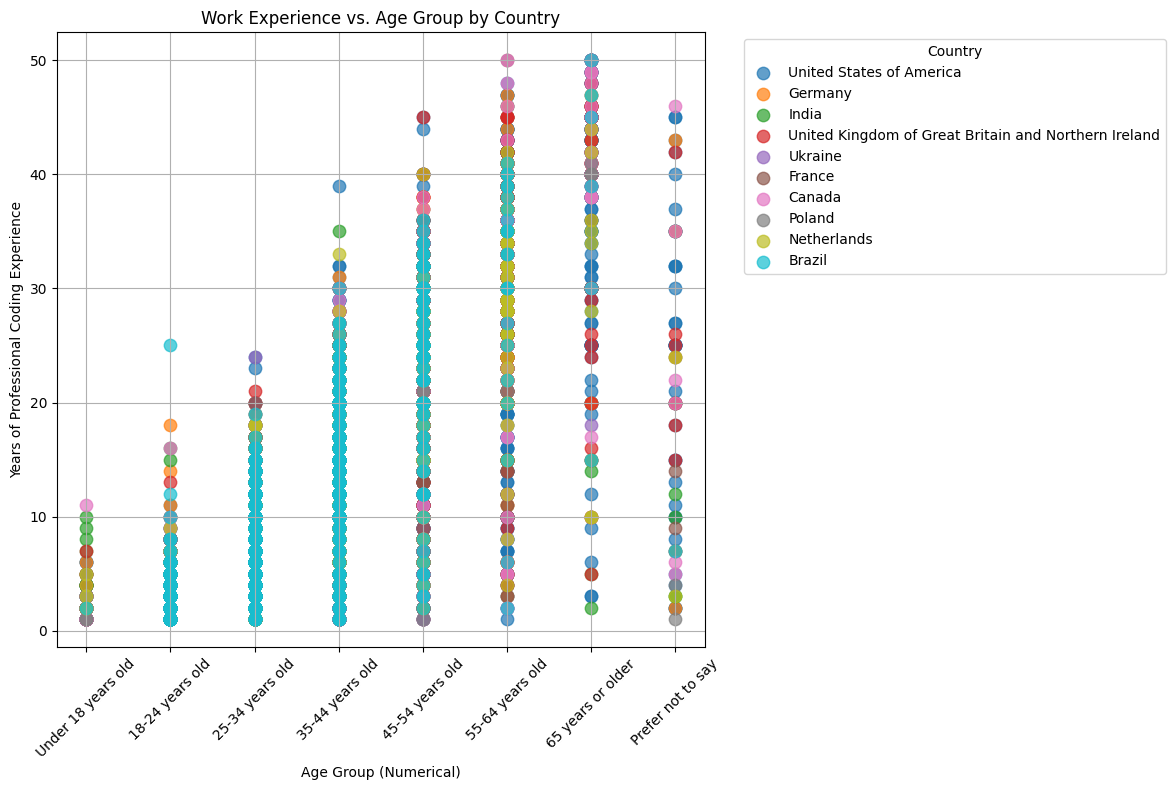

In [52]:
# Filter out missing values
df_filtered = df.dropna(subset=['Age', 'YearsCodePro', 'Country'])

# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Apply the mapping using assign (with explicit inference)
df_filtered = df_filtered.assign(AgeNum=df_filtered['Age'].replace(age_mapping).infer_objects(copy=False))

# Convert 'YearsCodePro' to numeric (improved handling of non-numeric values)
def convert_to_numeric(x):
    try:
        return pd.to_numeric(x)
    except:
        return None  # Or handle non-numeric values differently (e.g., imputation)

df_filtered['YearsCodePro'] = df_filtered['YearsCodePro'].apply(convert_to_numeric)

# Select top 10 countries for better visualization
top_10_countries = df_filtered['Country'].value_counts().head(10).index.tolist()

# Create the scatter plot
plt.figure(figsize=(12, 8))

for country in top_10_countries:
    country_data = df_filtered[df_filtered['Country'] == country]
    plt.scatter(country_data['AgeNum'], country_data['YearsCodePro'], 
                label=country, 
                marker='o', 
                s=80, 
                alpha=0.7)

# Set labels and title
plt.xlabel('Age Group (Numerical)')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Work Experience vs. Age Group by Country')

# Customize x-axis labels
plt.xticks(range(8), age_mapping.keys(), rotation=45)

# Legend
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Country')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
